# Exploration Notes

Oh this one has so many fun moments! There's this one, right now. Where my kernal didn't shut down effectively so I'm having to re-type the notebook (at least I can clean while I re-type, and it wasn't as bad as it could have been!)

There's me struggling all day to finally find a function that works, to find out that Raf shared a way to do just that in the first two minutes of the Violin Plots video! That's alright, I just keep repeating my mantra for the week: "It's not wasted time if you learned something.... right?!"

First, I pull in the dfGenreFin info and the unique genres list. I dropped unnecessary columns, and we decided on our main list of genres.

Then I graphed the mean gross by genre and the mean production budget by genre; along with the top 7 and 5 from each.

Then I tried playing around with Seaborn, and attempted to chart the two of these together. That's when I realized that I was going to have to stack the data by Genre - which took another frustratingly long time to pull a dataframe together for. 

Alas! We have persevered, and managed to plot an ugly little violin chart that displays the instances of ROI on the top 5 grossing genres(mean).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%store -r dfGenreFin

In [3]:
dfGenreFin.rename(columns = {'index' : 'title'}, inplace = True)
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


- Pulling in list of unique genres

In [4]:
%store -r oneGenreList

In [5]:
uniqueGenres = oneGenreList['genres'].unique()

In [6]:
uniqueGenres

array(['Drama', 'Comedy', 'Biography', 'History', 'Documentary', 'Sci-Fi',
       'Thriller', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Musical',
       'Western', 'Romance', 'Mystery', 'Crime', 'Animation', 'Family',
       'Sport', 'Music', 'News', 'Talk-Show', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [7]:
len(uniqueGenres)

25

# Getting information ready for plotting

- Or so I thought!

In [8]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\kekay\\flatiron\\Module01\\Project\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320\\functions.py'>

In [9]:
fun.count('News', dfGenreFin)

11

Ignore:
- Game-Show : 0
- Reality-TV : 0
- Talk-Show : 0
- News : 11 (Featured in other genres as well)

In [10]:
genreList = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'Comedy', 'History', 
             'Documentary', 'Sci-Fi', 'Thriller', 'Horror', 'Fantasy', 'Musical', 'Western', 'Romance', 
             'Mystery', 'Crime', 'Family', 'Sport', 'Music', 'War']

In [11]:
genreList.sort()
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

# Mean Gross by Genre

In [12]:
def getMeanGrossData():
    data = []
    for i in genreList:
        data.append(fun.meanGross(i, dfGenreFin))
    return data

In [13]:
meanGrossData = getMeanGrossData()

In [14]:
meanGrossData

[54043316.219251335,
 88147457.58236273,
 83692006.28921568,
 21693540.207407407,
 33302470.265402842,
 23121060.36642599,
 23248293.022421524,
 19737887.80093761,
 60032657.344827585,
 66945316.448275864,
 19700843.310526315,
 27129086.14412417,
 35340738.59550562,
 82193277.88636364,
 24146523.306060605,
 17938810.294209704,
 82307881.88936171,
 28450808.24742268,
 27549630.76994681,
 14440282.333333334,
 24682976.085714284]

In [15]:
grossData = pd.DataFrame({'Genre' : genreList,
                          'Mean Gross' : meanGrossData,})

grossData

,Genre,Mean Gross
0,Action,5.404332e+07
1,Adventure,8.814746e+07
2,Animation,8.369201e+07
3,Biography,2.169354e+07
4,Comedy,3.330247e+07
5,Crime,2.312106e+07
6,Documentary,2.324829e+07
7,Drama,1.973789e+07
8,Family,6.003266e+07
9,Fantasy,6.694532e+07


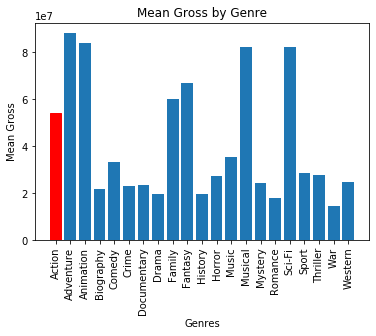

In [16]:
data = meanGrossData
labels = genreList
plt.xticks(range(len(data)), labels, rotation= 90)
plt.xlabel('Genres')
plt.ylabel('Mean Gross')
plt.title('Mean Gross by Genre')
bar_list = plt.bar(range(len(data)), data)



bar_list[0].set_color('r')
plt.show()

- ^ It's definitely gross!

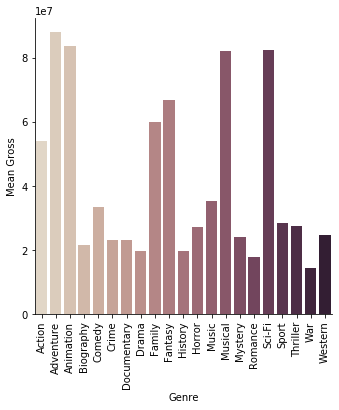

In [18]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette="ch:.25", data= grossData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [19]:
top7GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][0]]
top5GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][9]]

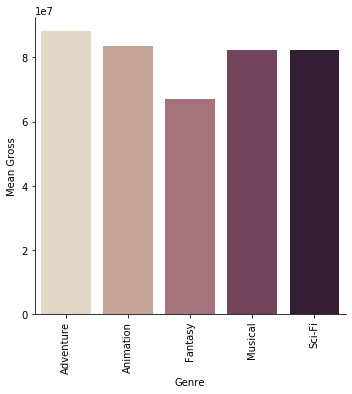

In [20]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette="ch:.25", data= top5GrossingGenres);
g.set_xticklabels(rotation = 90)
plt.show()

# Mean Production Budget by Genre

In [21]:
def getMeanBudgetData():
    data = []
    for i in genreList:
        data.append(fun.meanBudget(i, dfGenreFin))
    return data

In [22]:
meanBudgetData = getMeanBudgetData()

In [23]:
budgetData = pd.DataFrame({'Genre' : genreList,
                           'Mean Budget' : meanBudgetData})

budgetData

,Genre,Mean Budget
0,Action,4.673630e+07
1,Adventure,7.063706e+07
2,Animation,5.766503e+07
3,Biography,1.519645e+07
4,Comedy,2.178094e+07
5,Crime,1.921784e+07
6,Documentary,1.833320e+07
7,Drama,1.521898e+07
8,Family,4.037878e+07
9,Fantasy,5.043849e+07


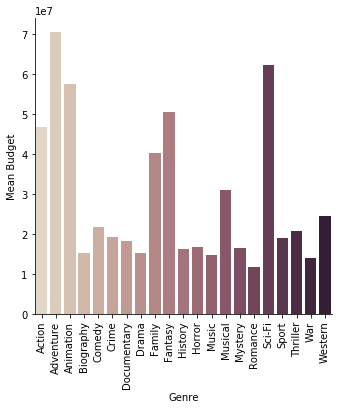

In [24]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= budgetData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [25]:
top7GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][13]]
top5GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][0]]

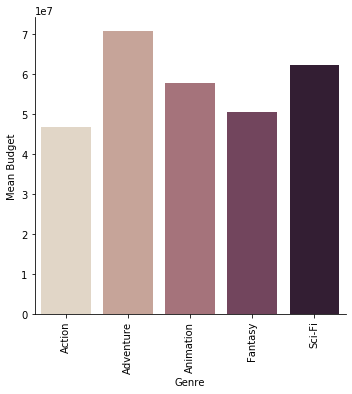

In [26]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= top5GenreBudgets);
g.set_xticklabels(rotation = 90)
plt.show()

# Try to graph both mean gross and mean budget

In [28]:
meanData = pd.DataFrame({'Genre' : genreList,
                         'Mean Gross' : meanGrossData,
                         'Mean Budget' : meanBudgetData})

In [29]:
meanData.head()

,Genre,Mean Gross,Mean Budget
0,Action,5.404332e+07,4.673630e+07
1,Adventure,8.814746e+07,7.063706e+07
2,Animation,8.369201e+07,5.766503e+07
3,Biography,2.169354e+07,1.519645e+07
4,Comedy,3.330247e+07,2.178094e+07


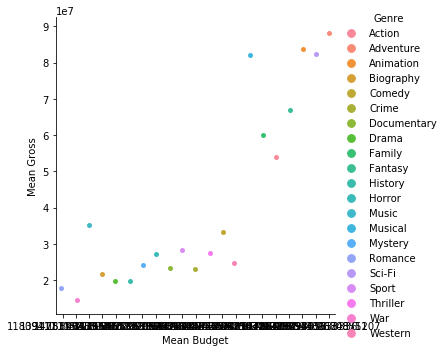

In [32]:
ax = sns.catplot(x= 'Mean Budget', y= 'Mean Gross', hue ='Genre', data = meanData)

- Okay not so much, maybe try something else:

In [33]:
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


In [34]:
dfGenreFinGrouped = dfGenreFin.groupby(['genresList'])[['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']]

In [35]:
dfGenreFinGrouped

# Let's group by Genre individually

In [36]:
 def getGenreInfo(keyword):    
    allInfo = {}
    title = []
    genre = []
    domestic_gross = []
    foreign_gross = []
    worldwide_gross = []
    production_budget = []
    for i in dfGenreFin.index:
        
        if any(keyword in g for g in dfGenreFin['genresList'][i]):
            genre.append(keyword)
            title.append(dfGenreFin['title'][i])
            domestic_gross.append(dfGenreFin['domestic_gross'][i])
            foreign_gross.append(dfGenreFin['foreign_gross'][i])
            worldwide_gross.append(dfGenreFin['worldwide_gross'][i])
            production_budget.append(dfGenreFin['production_budget'][i])
        allInfo.update({'Title' : title,
                        'Genre' : genre,
                        'Domestic Gross' : domestic_gross,
                        'Foreign Gross' : foreign_gross,
                        'Worldwide Gross' : worldwide_gross,
                        'Production Budget' : production_budget})
    return allInfo

In [37]:
nextTestDF = pd.DataFrame(getGenreInfo('Action'))
nextTestDF

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0
...,...,...,...,...,...,...
930,You're Next,Action,18500000.0,8387177.0,26887177.0,1000000.0
931,Young Detective Dee: Rise of the Sea Dragon,Action,87800.0,72200000.0,72287800.0,0.0
932,Z Storm,Action,0.0,2053330.0,2053330.0,7000000.0
933,Zombeavers,Action,14900.0,0.0,14900.0,0.0


In [38]:
def getDataForGenres():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))

In [39]:
for i in genreList:
        print(getGenreInfo(i))

{'Title': ["'71", '12 Rounds', '12 Strong', '13 Assassins', '14 Blades', '1911', '2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '3 Days to Kill', '30 Minutes or Less', '300: Rise of an Empire', '47 Ronin', '5 Days of War', '7 Days in Entebbe', 'A Gentleman', 'A Good Day to Die Hard', 'A Melody to Remember', 'A Taxi Driver', 'A Walk Among the Tombstones', 'ATM', 'Abduction', 'Abduction', 'Abduction', 'Abraham Lincoln: Vampire Hunter', 'Act of Valor', 'Action Jackson', 'Adam', 'Admiral', 'Adrift', 'After Earth', 'Agent Vinod', 'Agneepath', 'Air Strike', 'Akira', 'Alex Cross', 'Alita: Battle Angel', 'All Is Lost', 'All or Nothing', 'Allied', 'Along with the Gods: The Two Worlds', 'American Assassin', 'American Heist', 'American Hero', 'American Made', 'American Sniper', 'American Ultra', 'Anna', 'Anonymous', 'Ant-Man', 'Ant-Man and the Wasp', 'Aquaman', "Assassin's Creed", 'Assassins', 'Asura: The City of Madness', 'Atomic Blonde', 'Attack on Titan: Part 1', 'Attack the Block

{'Title': ['12 Years a Slave', '127 Hours', '42', '6 Below: Miracle on the Mountain', 'A Dangerous Method', 'A Man for All Seasons', 'A Private War', 'A Quiet Passion', 'A Royal Affair', 'A Street Cat Named Bob', 'A Tale of Love and Darkness', 'A United Kingdom', 'A Walk in the Woods', 'Admiral', 'Adrift', 'Advanced Style', 'Afterimage', 'Against the Sun', 'Alive', 'All Eyez on Me', 'All or Nothing', 'All or Nothing', 'All the Money in the World', 'American Made', 'American Sniper', 'Amy', 'Anchor Baby', 'Anna', 'Anna', 'Annie', 'Antarctica: A Year on Ice', 'Anthropoid', 'Antonio Lopez 1970: Sex Fashion & Disco', 'Argo', 'Aurora', 'Author: The JT LeRoy Story', 'Ballerina', 'Bambi', 'Barbara', 'Bastards', 'Battle of the Sexes', 'Beautiful', 'Beautiful Boy', 'Becoming Astrid', 'Belle', 'Bernie', 'Bhaag Milkha Bhaag', 'Big Eyes', 'Big Miracle', 'Birth of the Dragon', 'BlacKkKlansman', 'Black Mass', 'Bleed for This', 'Bobby', 'Bohemian Rhapsody', 'Borg vs. McEnroe', 'Born to Fly: Elizabeth

{'Title': ['2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '30 Minutes or Less', '7 Boxes', 'A Ciambra', 'A Lonely Place to Die', 'A Most Violent Year', 'A Most Wanted Man', 'A Nightmare on Elm Street', 'A Nightmare on Elm Street', 'A Simple Favor', 'A Somewhat Gentle Man', 'A Walk Among the Tombstones', 'A War', 'Absolutely Fabulous: The Movie', "Ain't Them Bodies Saints", 'Alex Cross', 'All Good Things', 'All Together', 'All the Money in the World', 'Alpha', 'Alpha', 'Always Kabhi Kabhi', 'American Heist', 'American Hustle', 'American Pastoral', 'Andhadhun', 'Anesthesia', 'Animal Kingdom', 'Anna', 'Annie Get Your Gun', 'As Good as Dead', 'Ashby', 'Asura: The City of Madness', 'Baby Driver', 'Bad Samaritan', 'Bad Santa 2', 'Bad Times at the El Royale', 'Batman: The Killing Joke', 'Baywatch', 'Beast', 'Beast', 'Beauty and the Dogs', 'Benji', 'Bernie', 'Better Watch Out', 'Beyond Outrage', 'Big Eyes', 'Big Game', 'Big Mommas: Like Father, Like Son', 'BlacKkKlansman', 'Black 

{'Title': ["'71", '1,000 Times Good Night', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Years', '1001 Grams', '102 Not Out', '12 Rounds', '12 Strong', '12 Years a Slave', '127 Hours', '13 Assassins', '17 Girls', '1911', '2 Days in New York', '2 States', '20,000 Days on Earth', '20th Century Women', '22 Bullets', '23 Blast', '28 Hotel Rooms', '3', '3', '3', '3', '3 Backyards', '3 Days to Kill', '3 Generations', '360', '42', '45 Years', '47 Meters Down', '47 Ronin', '5 Days of War', '5 Flights Up', '5 to 7', '50 to 1', '50/50', '6 Below: Miracle on the Mountain', '7 Boxes', '7 Days in Entebbe', '90 Minutes in Heaven', '99 Homes', 'A Beautiful Life', 'A Better Life', 'A Better Life', 'A Bigger Splash', 'A Bottle in the Gaza Sea', 'A Brilliant Young Mind', 'A Ciambra', 'A Coffee in Berlin', 'A Cure for Wellness', 'A Dangerous Method', "A Dog's Purpose", 'A Fantastic Woman', 'A Five Star Life', 'A Gentleman', 'A Ghost Story', 'A Girl Walks Home Alone at Night', 'A Hijacking', 'A Hol

{'Title': ['12 Strong', '12 Years a Slave', '14 Blades', '7 Days in Entebbe', 'A Royal Affair', 'A Tale of Love and Darkness', 'A Taxi Driver', 'Above and Beyond', 'Afterimage', 'All or Nothing', 'Alone in Berlin', 'Anthropoid', 'Bajirao Mastani', 'Beginning of the Great Revival', 'Bel Ami', 'Beloved Sisters', 'Beneath Hill 60', 'Bridge of Spies', 'Burke and Hare', 'Capital', 'Cave of Forgotten Dreams', 'Chappaquiddick', 'Child 44', 'Churchill', 'Cinco de Mayo, La Batalla', 'Colette', 'Colette', 'Contact', 'Coriolanus', 'Darkest Hour', 'Deepwater Horizon', 'Detroit', 'Dunkirk', 'Edmond', 'Elvis & Nixon', 'Emperor', 'Enough', 'Escobar: Paradise Lost', 'Even the Rain', 'Experimenter', 'Eyes Wide Open', 'First Man', 'For Greater Glory: The True Story of Cristiada', 'For No Good Reason', 'Fort McCoy', 'Francofonia', 'Frantz', 'Free Men', 'Ghost Town', 'Gold', 'Gold', 'Hacksaw Ridge', 'Hell and Back Again', 'Heneral Luna', 'Hidden Figures', 'Home', 'Home', 'Home', 'Home', 'Hostage', 'In Thi

{'Title': ['Ae Dil Hai Mushkil', 'Alice in Wonderland', 'Amen', 'Anjaana Anjaani', 'Annie', 'Argentina', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Beauty and the Beast', 'Becoming Traviata', 'Beloved', 'Brooklyn', 'Bully', 'Burlesque', 'Chance Pe Dance', 'Cinderella', 'Cinderella', 'Cinderella', 'Cinderella', 'Emma', 'Groove', 'Himmatwala', 'Housefull 2', 'Into the Woods', 'Jig', 'Jodi Breakers', 'Make Your Move', 'Mamma Mia! Here We Go Again', 'My Fair Lady', 'Our Last Tango', 'Pinocchio', 'Pinocchio', 'Rock of Ages', 'Sanam Teri Kasam', 'Showtime', 'Standing Ovation', 'Stuck', 'The Covenant', 'The Ghastly Love of Johnny X', 'The Greatest Showman', 'The Last Five Years', 'West Side Story', 'Yeh Jawaani Hai Deewani'], 'Genre': ['Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 'Musical', 

{'Title': ['10 Years', '12 Rounds', '2 Days in New York', '2 States', '28 Hotel Rooms', '3', '3', '45 Years', '5 to 7', '50/50', 'A Beautiful Life', 'A Better Life', 'A Brilliant Young Mind', 'A Dangerous Method', 'A Few Best Men', 'A Five Star Life', 'A Ghost Story', 'A Good Old Fashioned Orgy', 'A Hologram for the King', 'A Little Chaos', 'A Man Called Ove', 'A Royal Night Out', 'A Silent Voice', 'A United Kingdom', 'A Wedding Invitation', 'A Werewolf Boy', 'About Last Night', 'Accidental Love', 'Acrimony', 'Admission', 'Adore', 'Adrift', "Ain't Them Bodies Saints", 'Akira', 'Albert Nobbs', 'All You Need Is Love', 'All You Need Is Love', 'All or Nothing', 'Allied', 'Aloha', 'Along the Roadside', 'Amen', 'American Honey', 'Amour', 'And So It Goes', 'Anna Karenina', 'Annie', 'Another Earth', 'Another Year', 'Appropriate Behavior', 'Arthur', 'August', 'Aurora', 'Austenland', 'Baar Baar Dekho', 'Bachelorette', 'Bad Teacher', 'Badrinath Ki Dulhania', 'Band Baaja Baaraat', 'Barfi', 'Barfi!

{'Title': ["'71", '11-11-11', '13 Sins', '14 Blades', '2:22', '3', '3 Days to Kill', '31', '360', '6 Souls', 'A Bigger Splash', 'A Good Day to Die Hard', 'A Hijacking', 'A Lonely Place to Die', 'A Monster with a Thousand Heads', 'A Most Violent Year', 'A Most Wanted Man', 'A Separation', 'ATM', 'Abduction', 'Abduction', 'Acrimony', 'Action Jackson', 'Adam', 'Addicted', 'Agent Vinod', 'Alien: Covenant', 'Alive', 'All or Nothing', 'All or Nothing', 'American Assassin', 'Amityville: The Awakening', 'Anchor Baby', 'Andhadhun', 'Anesthesia', 'Anna', 'Anna', 'Annabelle', 'Annabelle: Creation', 'Anonymous', 'Anthropoid', 'Antiviral', 'Anywhere But Here', 'Apartment 143', 'Arbitrage', 'Area 51', 'Argo', 'As Good as Dead', 'Assassins', 'At Any Price', 'Atomic Blonde', 'Aurora', 'Baaghi', 'Baaghi 2', 'Bad Company', 'Bad Samaritan', 'Bait', 'Bait', 'Bait', 'Banshee Chapter', 'Beast', 'Beast', 'Beauty and the Dogs', 'Beirut', 'Berberian Sound Studio', 'Bethlehem', 'Beyond the Black Rainbow', 'Beyo

In [40]:
def thisDict():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))
    return thisDict

In [41]:
print(thisDict())

{'Title': ['A Million Ways to Die in the West', 'Blackthorn', 'Branded', 'Casa de mi Padre', 'Destiny', 'Django Unchained', 'Far from Men', 'Frontera', 'Gold', 'Hostiles', 'Jane Got a Gun', 'Jauja', 'Let the Bullets Fly', "Meek's Cutoff", "No Man's Land", 'Red Hill', 'Saving Private Perez', 'Slow West', 'Steel', 'The Divide', 'The Forgotten', 'The Gunman', 'The Homesman', 'The Keeping Room', 'The Kid', 'The Lone Ranger', 'The Magnificent Seven', 'The Return', 'The Rider', 'The Salvation', "The Warrior's Way", 'Trespass', 'True Grit', 'Wild Things', 'Witness'], 'Genre': ['Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western'], 'Domestic Gross': [43100000.0, 201000

# After many an error, we have found a way!

In [42]:
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [43]:
def toConcat():
    concatList = []
    for i in genreList:
        thisDF = pd.DataFrame(getGenreInfo(i))
        concatList.append(thisDF)
    return concatList

In [45]:
GenreDF = pd.concat(toConcat())
GenreDF.head()

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0


In [46]:
GenreDF2 = GenreDF.reset_index()
GenreDF2.head()

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0


# Try to plot:

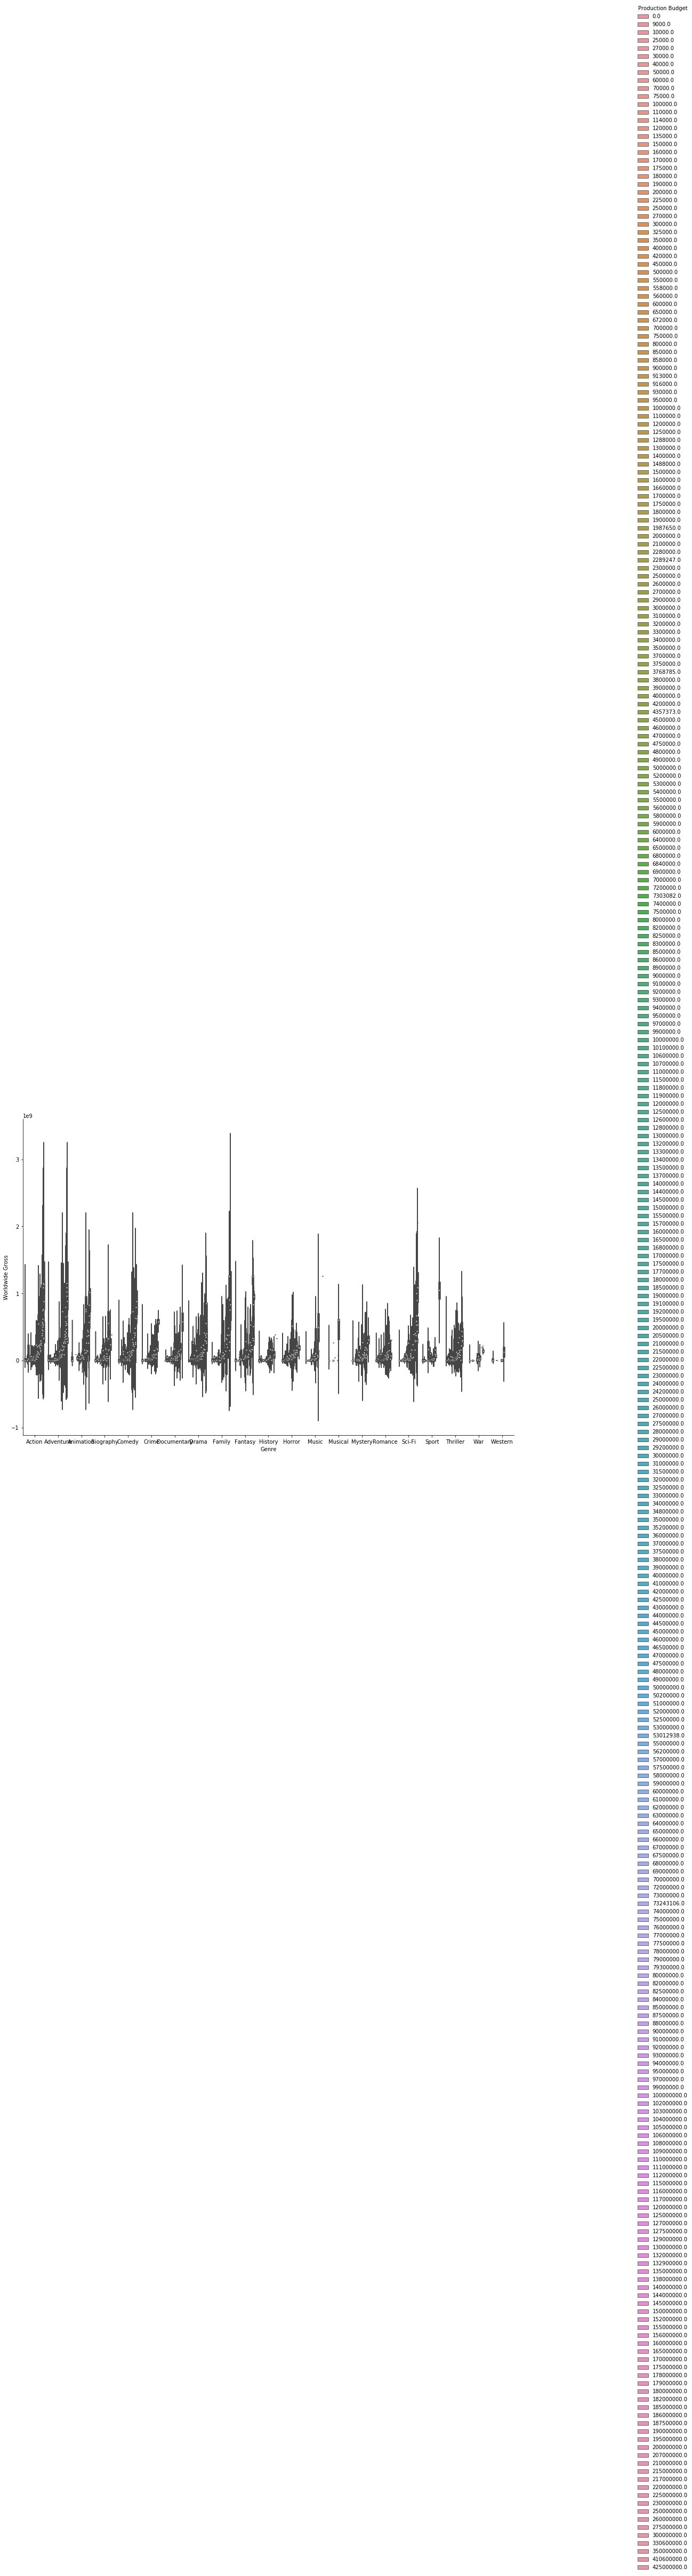

In [47]:
g = sns.catplot(x= 'Genre', y= 'Worldwide Gross', hue ='Production Budget', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- Too much information, let's break it down a little more

In [48]:
def returnRate():
    returnRate = []
    for i in GenreDF.index:
        thisGross = GenreDF['Worldwide Gross'][i]
        thisBudget = GenreDF['Production Budget'][i]
        thisIncrease = thisGross - thisBudget
        thisRate = (thisIncrease / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

- This returnRate function brought divide by zero errors. So I reset the index to the DF.

# We're Getting Somewhere!

In [49]:
def returnRate2():
    returnRate = []
    for i in GenreDF2.index:
        thisBudget = (GenreDF2['Production Budget'][i])
        if (thisBudget == 0):
            thisRate = 0.0
        else:
            thisGross = GenreDF2['Worldwide Gross'][i]
            thisRate = (thisGross / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

In [50]:
GenreDF['Return Rate'] = returnRate2()

In [51]:
GenreDF.head()

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate
0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000


# Try plotting again:

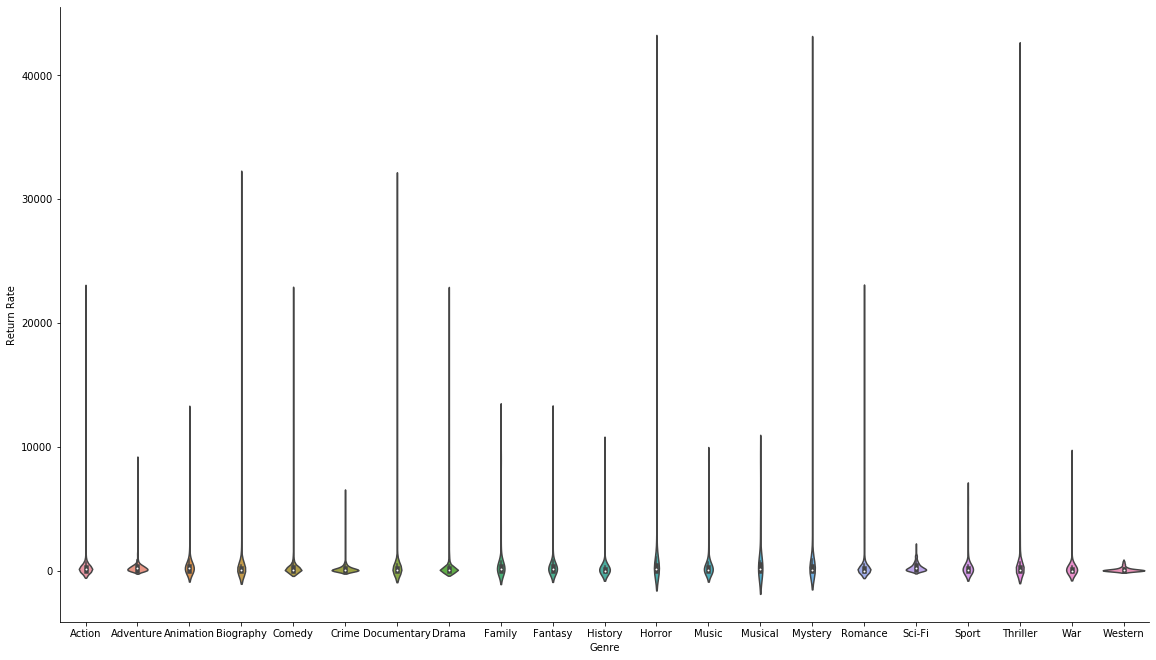

In [52]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- What if we focus on the top grossing genres, and then plot the rate of return on those?

In [53]:
GenreDF2= GenreDF.loc[(GenreDF['Genre']== 'Action')    |
                      (GenreDF['Genre']== 'Adventure') |
                      (GenreDF['Genre']== 'Animation') |
                      (GenreDF['Genre']== 'Fantasy')   |
                      (GenreDF['Genre']== 'SciFi')     |
                      (GenreDF['Genre']== 'Musical')]

In [55]:
GenreDF2

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate
0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000
...,...,...,...,...,...,...,...
39,The Ghastly Love of Johnny X,Musical,2436.0,0.0,2436.0,2000000.0,0.121800
40,The Greatest Showman,Musical,174300000.0,260700000.0,386665550.0,84000000.0,460.316131
41,The Last Five Years,Musical,147299.0,57999.0,205298.0,2000000.0,10.264900
42,West Side Story,Musical,43700000.0,0.0,43700000.0,6000000.0,728.333333


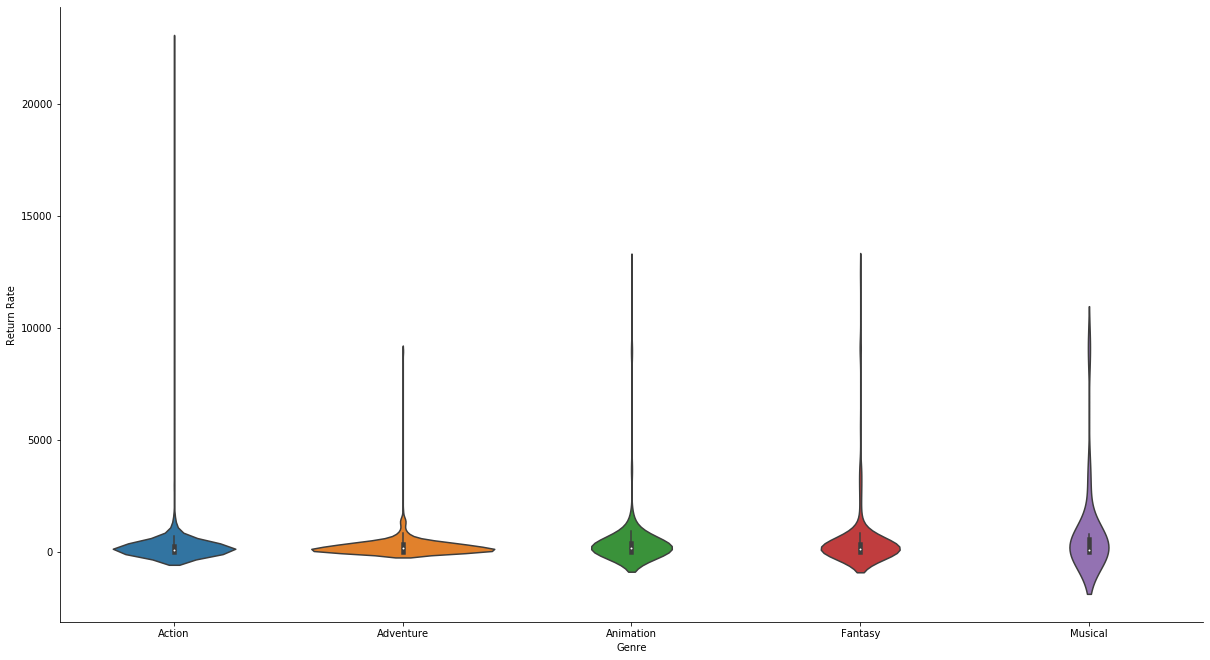

In [56]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

# Getting Ever Closer

- We still need to make this graph more readable, also need to have hard numbers.